# Store Sales - Time Series Forecasting

This project requires to study the number of sales family products that are sold in a chain store at a certain period of time. Based on these studies, build a model for the forecast of future sales.

## Pre-analysis

### Loading the necessary libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

plt.style.use("seaborn")
import warnings
warnings.filterwarnings('ignore')

pd.options.display.max_rows = 2000
pd.options.display.max_columns = 500

### Loading all Data

In [3]:
train = pd.read_csv('/kaggle/input/store-sales-time-series-forecasting/train.csv')
test = pd.read_csv('/kaggle/input/store-sales-time-series-forecasting/test.csv')
transactions = pd.read_csv('/kaggle/input/store-sales-time-series-forecasting/transactions.csv')
oil = pd.read_csv('/kaggle/input/store-sales-time-series-forecasting/oil.csv')
holidays_events = pd.read_csv('/kaggle/input/store-sales-time-series-forecasting/holidays_events.csv')
stores = pd.read_csv('/kaggle/input/store-sales-time-series-forecasting/stores.csv')

### Let's study our data

#### Data 'train'

In [5]:
train.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   id           3000888 non-null  int64  
 1   date         3000888 non-null  object 
 2   store_nbr    3000888 non-null  int64  
 3   family       3000888 non-null  object 
 4   sales        3000888 non-null  float64
 5   onpromotion  3000888 non-null  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB


In [6]:
train.sample(5)

,id,date,store_nbr,family,sales,onpromotion
2973855,2973855,2017-07-31,5,PLAYERS AND ELECTRONICS,10.0,0
129874,129874,2013-03-14,52,LADIESWEAR,0.0,0
1698742,1698742,2015-08-14,23,BABY CARE,0.0,0
1859533,1859533,2015-11-12,34,HOME AND KITCHEN II,9.0,0
1548853,1548853,2015-05-22,17,SCHOOL AND OFFICE SUPPLIES,0.0,0


In [7]:
train.isnull().sum()

id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64

#### Data 'test'

In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           28512 non-null  int64 
 1   date         28512 non-null  object
 2   store_nbr    28512 non-null  int64 
 3   family       28512 non-null  object
 4   onpromotion  28512 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 1.1+ MB


In [9]:
test.sample(5)

,id,date,store_nbr,family,onpromotion
27993,3028881,2017-08-31,44,DELI,11
9046,3009934,2017-08-21,13,BOOKS,0
10904,3011792,2017-08-22,15,HARDWARE,0
26816,3027704,2017-08-31,11,LAWN AND GARDEN,0
16537,3017425,2017-08-25,23,BOOKS,0


In [10]:
test.isnull().sum()

id             0
date           0
store_nbr      0
family         0
onpromotion    0
dtype: int64

#### Data 'transactions'

In [11]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          83488 non-null  object
 1   store_nbr     83488 non-null  int64 
 2   transactions  83488 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.9+ MB


In [12]:
transactions.sample(5)

,date,store_nbr,transactions
60496,2016-06-05,1,489
72075,2017-01-14,48,3852
14138,2013-11-02,4,1694
58545,2016-04-29,11,2079
78034,2017-05-07,1,523


In [13]:
transactions.isnull().sum()

date            0
store_nbr       0
transactions    0
dtype: int64

#### Data 'stores'

In [14]:
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   store_nbr  54 non-null     int64 
 1   city       54 non-null     object
 2   state      54 non-null     object
 3   type       54 non-null     object
 4   cluster    54 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 2.2+ KB


In [15]:
stores.sample(5)

,store_nbr,city,state,type,cluster
27,28,Guayaquil,Guayas,E,10
38,39,Cuenca,Azuay,B,6
18,19,Guaranda,Bolivar,C,15
39,40,Machala,El Oro,C,3
12,13,Latacunga,Cotopaxi,C,15


In [16]:
stores.isnull().sum()

store_nbr    0
city         0
state        0
type         0
cluster      0
dtype: int64

#### Data 'oil'

In [17]:
oil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        1218 non-null   object 
 1   dcoilwtico  1175 non-null   float64
dtypes: float64(1), object(1)
memory usage: 19.2+ KB


In [18]:
oil.sample(5)

,date,dcoilwtico
1199,2017-08-07,49.37
567,2015-03-05,50.76
94,2013-05-13,94.76
387,2014-06-26,106.49
266,2014-01-08,91.90


In [19]:
oil.isnull().sum()

date           0
dcoilwtico    43
dtype: int64

#### Data 'holiday_events'

In [20]:
holidays_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         350 non-null    object
 1   type         350 non-null    object
 2   locale       350 non-null    object
 3   locale_name  350 non-null    object
 4   description  350 non-null    object
 5   transferred  350 non-null    bool  
dtypes: bool(1), object(5)
memory usage: 14.1+ KB


In [21]:
holidays_events.sample(5)

,date,type,locale,locale_name,description,transferred
37,2012-12-25,Holiday,National,Ecuador,Navidad,False
32,2012-12-22,Holiday,Local,Salinas,Cantonizacion de Salinas,False
151,2014-12-22,Holiday,Local,Salinas,Cantonizacion de Salinas,False
146,2014-12-05,Additional,Local,Quito,Fundacion de Quito-1,False
251,2016-05-13,Event,National,Ecuador,Terremoto Manabi+27,False


In [22]:
holidays_events.isnull().sum()

date           0
type           0
locale         0
locale_name    0
description    0
transferred    0
dtype: int64

## Data analysis. EDA.

### Data train

In [23]:
train['date'] = pd.to_datetime(train['date'])

In [24]:
train.shape

(3000888, 6)

In [25]:
train.columns

Index(['id', 'date', 'store_nbr', 'family', 'sales', 'onpromotion'], dtype='object')

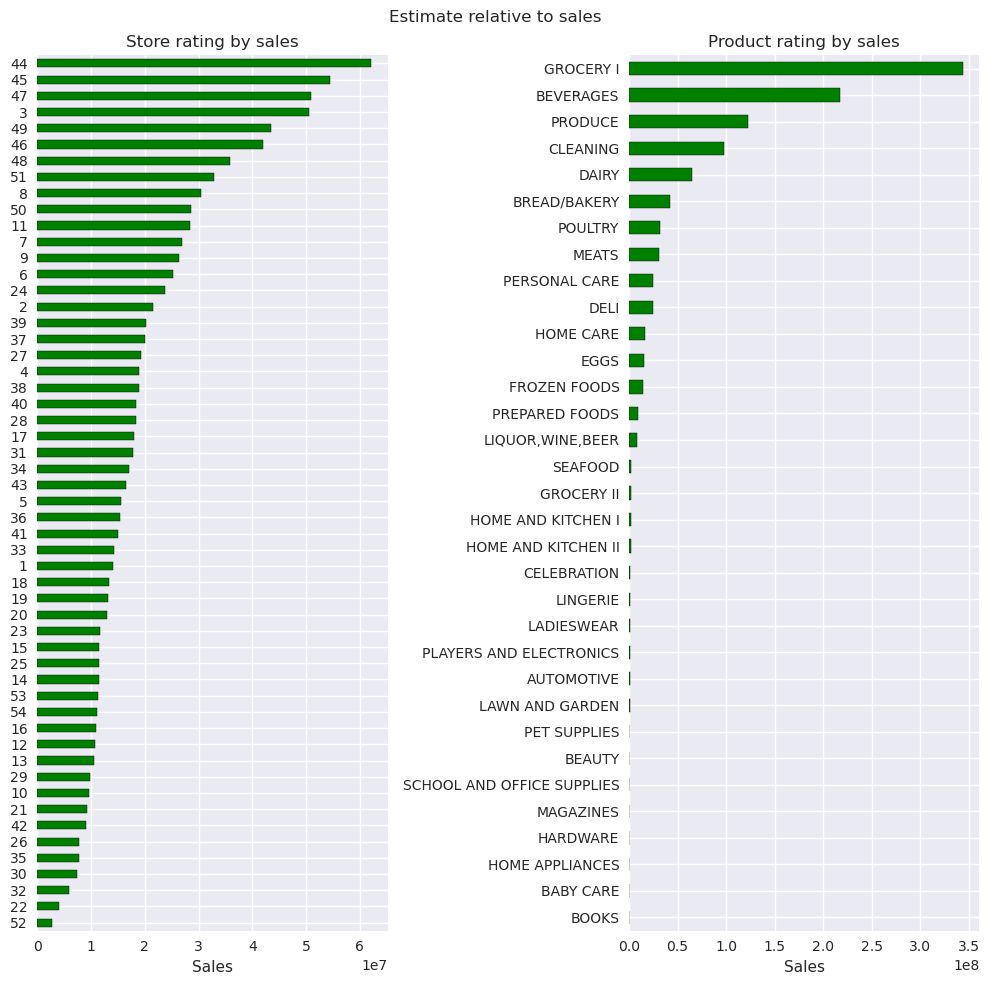

In [26]:
plt.subplot(1,2,1)
train.groupby('store_nbr')['sales'].sum().sort_values().plot(kind='barh', 
                                figsize=(10,10), edgecolor="k", color='green')
plt.ylabel('')
plt.yticks(rotation=0)
plt.xlabel('Sales')
plt.title('Store rating by sales')

plt.subplot(1,2,2)
train.groupby('family')['sales'].sum().sort_values().plot(kind='barh', 
                                figsize=(10,10), edgecolor="k", color='green')
plt.ylabel('')
plt.yticks(rotation=0)
plt.xlabel('Sales')
plt.title('Product rating by sales')

plt.suptitle('Estimate relative to sales')
plt.tight_layout()
plt.show()

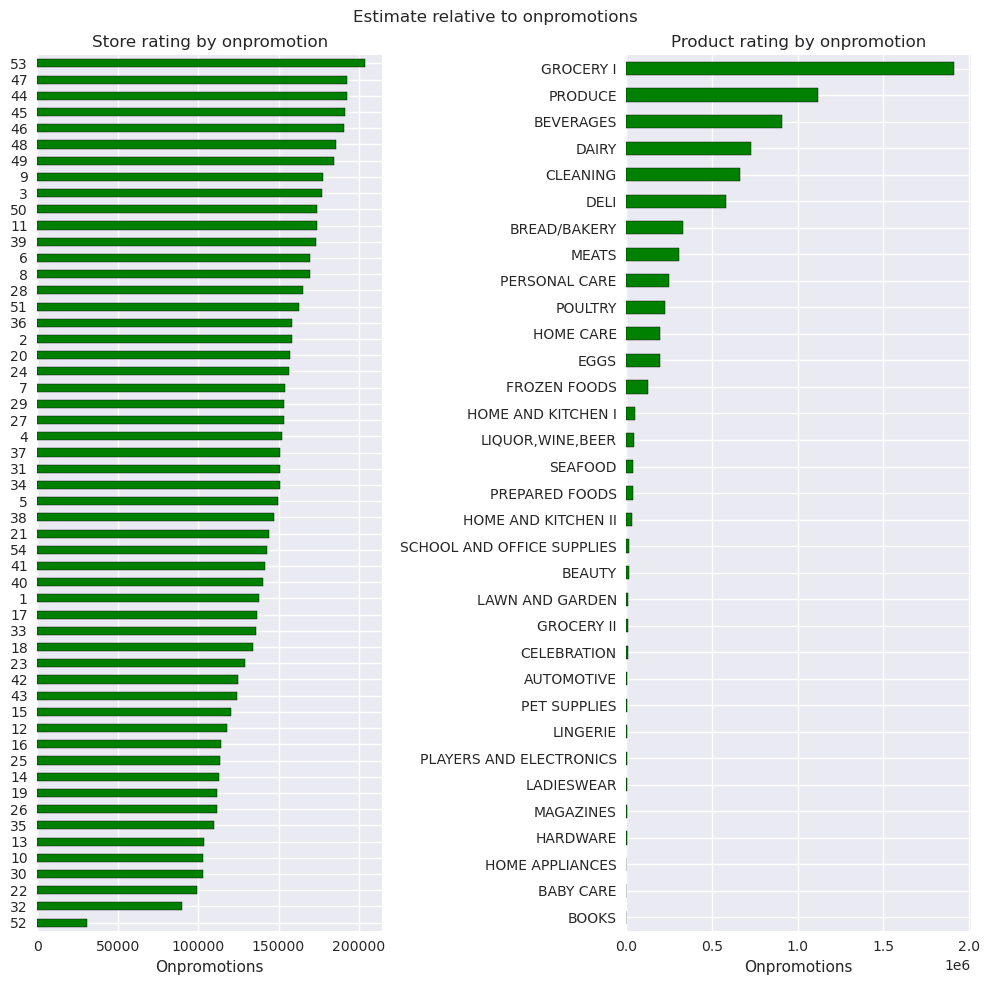

In [27]:
plt.subplot(1,2,1)
train.groupby('store_nbr')['onpromotion'].sum().sort_values().plot(kind='barh', 
                         figsize=(10,10), edgecolor="k", color='green')
plt.ylabel('')
plt.yticks(rotation=0)
plt.xlabel('Onpromotions')
plt.title('Store rating by onpromotion')

plt.subplot(1,2,2)
train.groupby('family')['onpromotion'].sum().sort_values().plot(kind='barh', 
                                figsize=(10,10), edgecolor="k", color='green')
plt.ylabel('')
plt.yticks(rotation=0)
plt.xlabel('Onpromotions')
plt.title('Product rating by onpromotion')

plt.suptitle('Estimate relative to onpromotions')
plt.tight_layout()
plt.show()

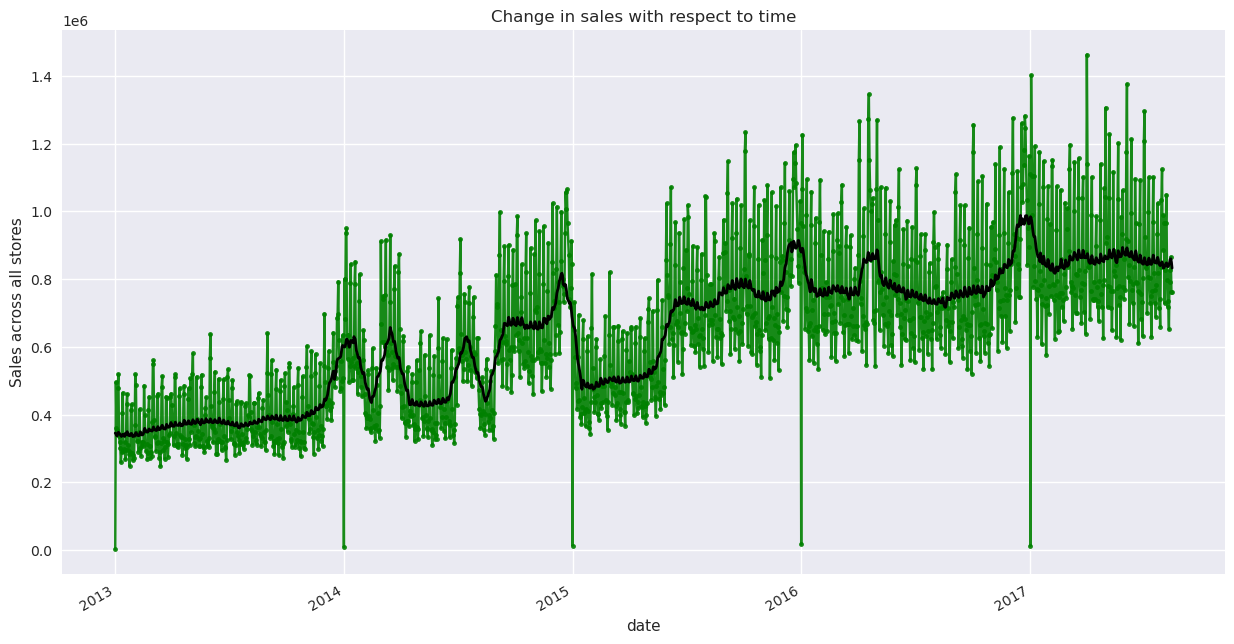

In [28]:
train.groupby('date')['sales'].sum().\
                plot(y="sales", marker=".", alpha=0.9, color='green', 
                figsize = (10,10));
train.groupby('date')['sales'].sum().\
        rolling(window=30, min_periods=7, center=True).mean().plot(lw=2, 
                                        color="k", figsize = (15,8));
plt.ylabel('Sales across all stores')
plt.xlabel('date')
plt.title('Change in sales with respect to time')
plt.show()

### Data transactions

In [29]:
transactions['date'] = pd.to_datetime(transactions['date'])

In [30]:
transactions.shape

(83488, 3)

In [31]:
transactions.columns

Index(['date', 'store_nbr', 'transactions'], dtype='object')

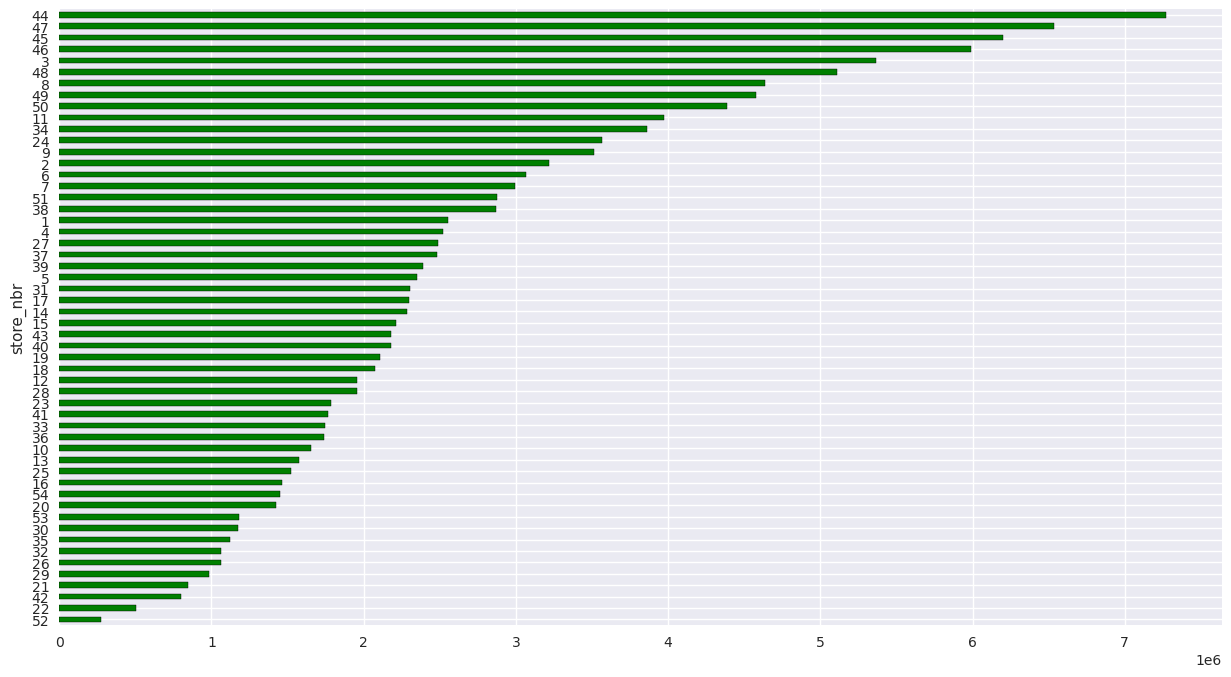

In [32]:
transactions.groupby('store_nbr')['transactions'].sum().sort_values().\
            plot(kind='barh', 
                         figsize=(15,8), edgecolor="k", color='green');

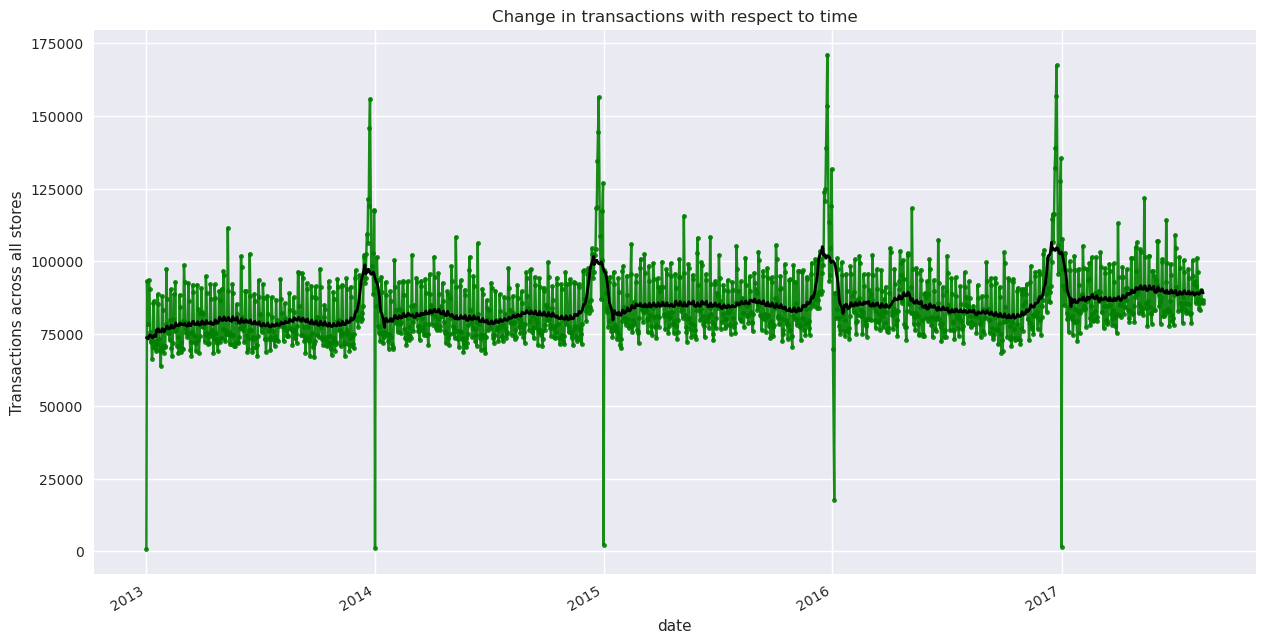

In [33]:
transactions.groupby('date')['transactions'].sum().\
                plot(y="transactions", marker=".", alpha=0.9, color='green', 
                figsize = (10,10));
transactions.groupby('date')['transactions'].sum().\
            rolling(window=30, min_periods=7, center=True).mean().plot(lw=2, 
                                        color="k", figsize = (15,8));
plt.ylabel('Transactions across all stores')
plt.xlabel('date')
plt.title('Change in transactions with respect to time')
plt.show()

### Data oil

In [34]:
oil['date'] = pd.to_datetime(oil['date'])

In [35]:
oil.shape

(1218, 2)

In [36]:
oil.columns

Index(['date', 'dcoilwtico'], dtype='object')

In [37]:
oil['dcoilwtico'] = oil['dcoilwtico'].fillna(method='bfill')

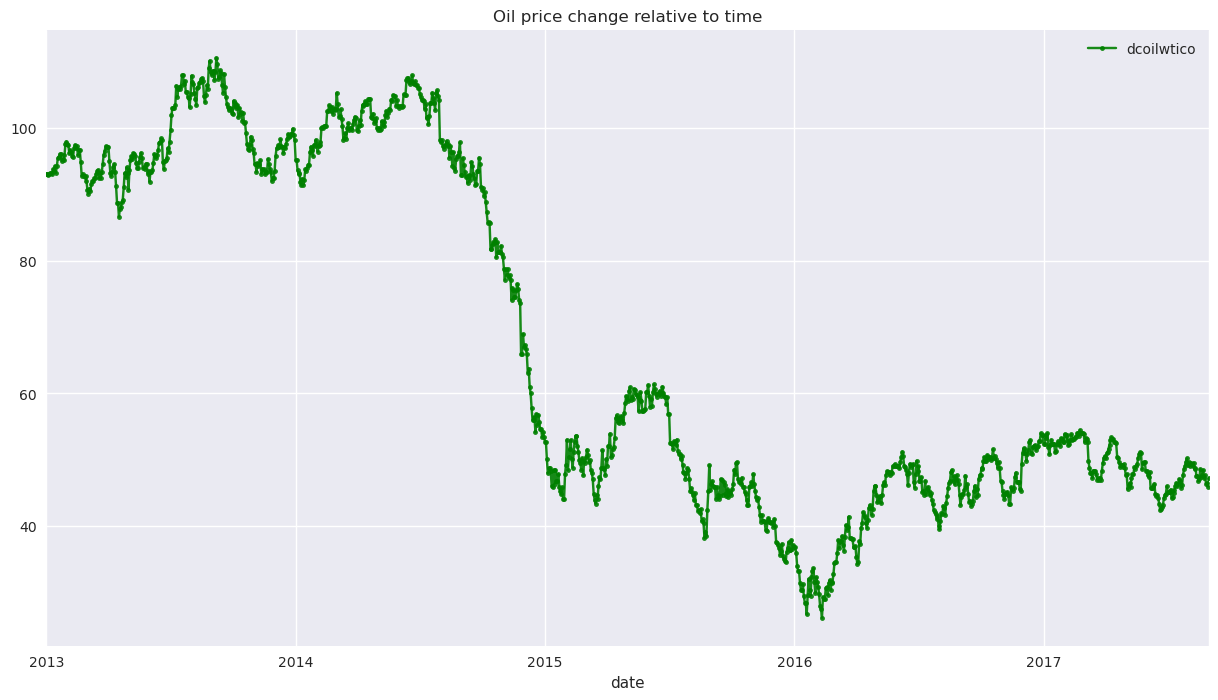

In [38]:
oil.plot(x='date', y="dcoilwtico", marker=".", alpha=0.9, color='green', 
                figsize = (15,8))
plt.title('Oil price change relative to time')
plt.show()

### Data holidays_events

In [39]:
holidays_events['date'] = pd.to_datetime(holidays_events['date'])

In [40]:
holidays_events.shape

(350, 6)

In [41]:
holidays_events.columns

Index(['date', 'type', 'locale', 'locale_name', 'description', 'transferred'], dtype='object')

In [42]:
pd.pivot_table(holidays_events, index='type', columns='transferred',
              values='locale_name', aggfunc='count')

transferred,False,True
type,,
Additional,51.0,NaN
Bridge,5.0,NaN
Event,56.0,NaN
Holiday,209.0,12.0
Transfer,12.0,NaN
Work Day,5.0,NaN


In [43]:
pd.pivot_table(holidays_events, index='type', columns='locale',
              values='locale_name', aggfunc='count')

locale,Local,National,Regional
type,,,
Additional,11.0,40.0,NaN
Bridge,NaN,5.0,NaN
Event,NaN,56.0,NaN
Holiday,137.0,60.0,24.0
Transfer,4.0,8.0,NaN
Work Day,NaN,5.0,NaN


In [44]:
pd.pivot_table(holidays_events, index='locale_name', columns='locale',
              values='type', aggfunc='count')

locale,Local,National,Regional
locale_name,,,
Ambato,12.0,NaN,NaN
Cayambe,6.0,NaN,NaN
Cotopaxi,NaN,NaN,6.0
Cuenca,7.0,NaN,NaN
Ecuador,NaN,174.0,NaN
El Carmen,6.0,NaN,NaN
Esmeraldas,6.0,NaN,NaN
Guaranda,12.0,NaN,NaN
Guayaquil,11.0,NaN,NaN


### Data stores

In [45]:
stores.shape

(54, 5)

In [46]:
stores.columns

Index(['store_nbr', 'city', 'state', 'type', 'cluster'], dtype='object')

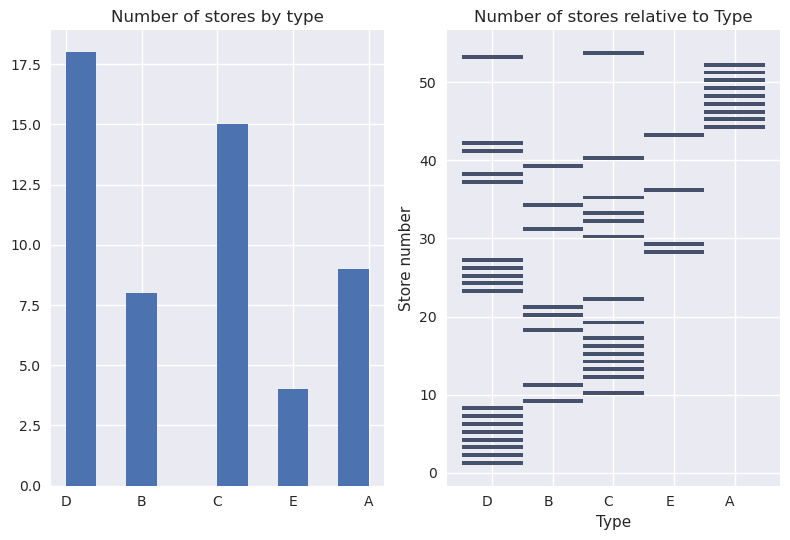

In [47]:
plt.subplot(1,2,1)
plt.hist(x='type', data=stores, bins=10)
plt.title('Number of stores by type')

plt.subplot(1,2,2)
sns.histplot(x='type',y='store_nbr',data=stores, binwidth=0.5)
plt.ylabel('Store number')
plt.xlabel('Type')
plt.xticks(horizontalalignment="right")
plt.title('Number of stores relative to Type')

plt.tight_layout()
plt.show()

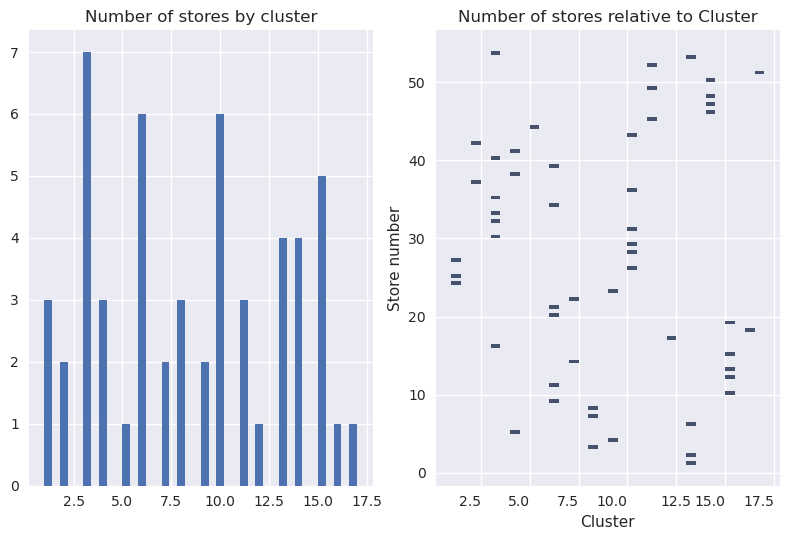

In [48]:
plt.subplot(1,2,1)
plt.hist(x='cluster', data=stores, bins=40)
plt.title('Number of stores by cluster')

plt.subplot(1,2,2)
sns.histplot(x='cluster',y='store_nbr',data=stores, binwidth=0.5)
plt.ylabel('Store number')
plt.xlabel('Cluster')
plt.xticks(horizontalalignment="right")
plt.title('Number of stores relative to Cluster')

plt.tight_layout()
plt.show()

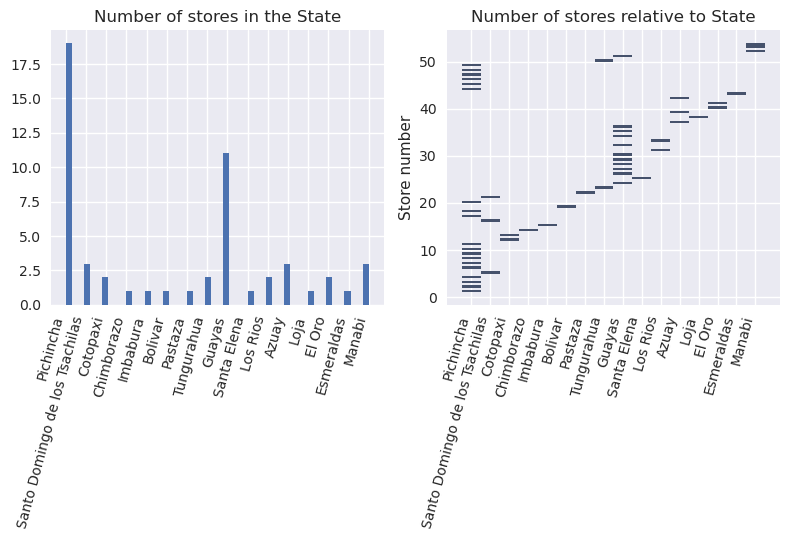

In [49]:
plt.subplot(1,2,1)
plt.hist(x='state', data=stores, bins=50);
plt.xticks(rotation=75, horizontalalignment="right")
plt.title('Number of stores in the State')

plt.subplot(1,2,2)
sns.histplot(x='state',y='store_nbr',data=stores, binwidth=0.5)
plt.ylabel('Store number')
plt.xlabel('')
plt.xticks(rotation=75, horizontalalignment="right")
plt.title('Number of stores relative to State')

plt.tight_layout()
plt.show()

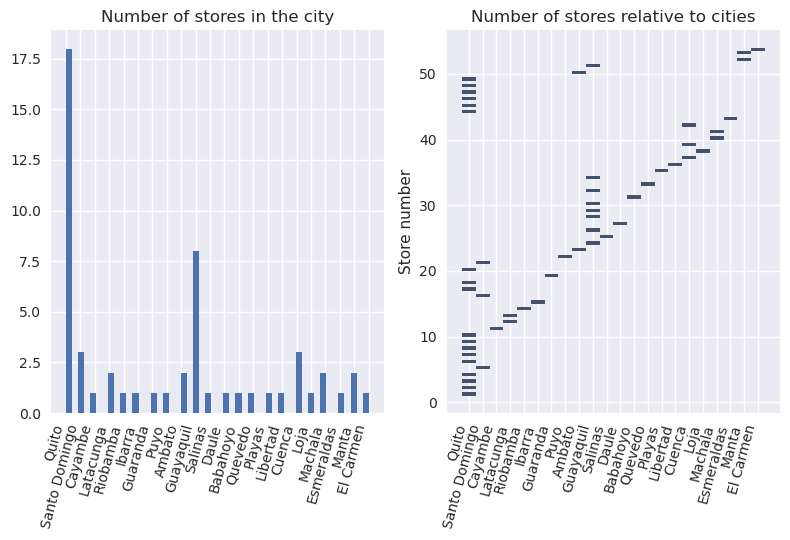

In [50]:
plt.subplot(1,2,1)
plt.hist(x='city', data=stores, bins=50);
plt.xticks(rotation=75, horizontalalignment="right")
plt.title('Number of stores in the city')

plt.subplot(1,2,2)
sns.histplot(x='city',y='store_nbr',data=stores, binwidth=0.5)
plt.ylabel('Store number')
plt.xlabel('')
plt.xticks(rotation=75, horizontalalignment="right")
plt.title('Number of stores relative to cities')

plt.tight_layout()
plt.show()

## Merging data and feature engineering

In [4]:
train_data = train.merge(transactions, how='left', on= ['date', 'store_nbr'])
train_data = train_data.merge(oil, how='left', on= 'date')
train_data = train_data.merge(holidays_events, how='left', on ='date')
train_data = train_data.merge(stores, how='left', on = 'store_nbr')
train_data = train_data.rename(columns = {"type_x" : "holiday_type", 
                                      "type_y" : "store_type"})

test_data = test.merge(transactions, how='left', on= ['date', 'store_nbr'])
test_data = test_data.merge(oil, how='left', on= 'date')
test_data = test_data.merge(holidays_events, how='left', on ='date')
test_data = test_data.merge(stores, how='left', on = 'store_nbr')
test_data = test_data.rename(columns = {"type_x" : "holiday_type", 
                                      "type_y" : "store_type"})

train_data['trest'] = 1
test_data['trest'] = 0 

all_data = pd.concat([train_data, test_data])

In [5]:
all_data['date'] = pd.to_datetime(all_data['date'])
all_data['year'] = all_data['date'].dt.year
all_data['month'] = all_data['date'].dt.month
all_data['week'] = all_data['date'].dt.isocalendar().week
all_data['quarter'] = all_data['date'].dt.quarter
all_data['day_of_week'] = all_data['date'].dt.day_name()

In [6]:
all_data['transactions'] = all_data['transactions'].fillna(0)
all_data['dcoilwtico'] = all_data['dcoilwtico'].fillna(0)
all_data['holiday_type'] = all_data['holiday_type'].fillna(0)
all_data['locale'] = all_data['locale'].fillna(0)
all_data['locale_name'] = all_data['locale_name'].fillna(0)
all_data['description'] = all_data['description'].fillna(0)
all_data['transferred'] = all_data['transferred'].fillna(0)

In [7]:
Vector_array = all_data.drop(['id','sales','date'], axis=1)
Vector_array = pd.get_dummies(Vector_array)
Vector_array.shape

(3082860, 233)

In [8]:
X = Vector_array[Vector_array.trest==1].drop(['trest'], axis=1)
X.shape

(3054348, 232)

In [9]:
A = Vector_array[Vector_array.trest==0].drop(['trest'], axis=1)
A.shape

(28512, 232)

In [10]:
y = all_data[all_data.trest==1].sales
y.shape

(3054348,)

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [13]:
model = LinearRegression()
_ = model.fit(X_train, y_train)

In [14]:
print('Train score: ', model.score(X_train, y_train))
print('Test score: ', model.score(X_test, y_test))

Train score:  0.5873111498154759
Test score:  0.5859186201746398


In [14]:
y_predict = model.predict(A)
Id = test['id']

In [15]:
submission = pd.DataFrame({'id': Id, 'sales': y_predict})

In [27]:
submission.to_csv('store_sales_submission.csv', index=False)